In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import matplotlib.cm as cm
import pandas as pd

In [2]:
dataset = pd.read_csv('sample.csv')
x = dataset['x']
y = dataset['y']

In [3]:
def guassian(x, *params):
    num_func = int(len(params)/3)

    y_list = []

    for i in range(num_func):
        y = np.zeros_like(x)
        param_range = list(range(3*i, 3*(i+1), 1))
        amp = params[int(param_range[0])]
        ctr = params[int(param_range[1])]
        wid = params[int(param_range[2])]
        y += amp * np.exp(-(x - ctr)**2 / wid)
        y_list.append(y)
    
    y_sum = np.zeros_like(x)
    for i in y_list:
        y_sum += i

    y_sum += params[-1]

    return y_sum

In [4]:
def fit_plot(x, *params):
    num_func = int(len(params)/3)

    y_list = []

    for i in range(num_func):
        y = np.zeros_like(x)
        param_range = list(range(3*i, 3*(i+1), 1))
        amp = params[int(param_range[0])]
        ctr = params[int(param_range[1])]
        wid = params[int(param_range[2])]
        y += amp * np.exp(-(x - ctr)**2 / wid) + params[-1]
        y_list.append(y)
    return y_list

In [7]:

guess = []
guess.append([4500, 760, 10])
guess.append([7500, 775, 10])

background = 5

guess_total = []
for i in guess:
    guess_total.extend(i)
guess_total.append(background)

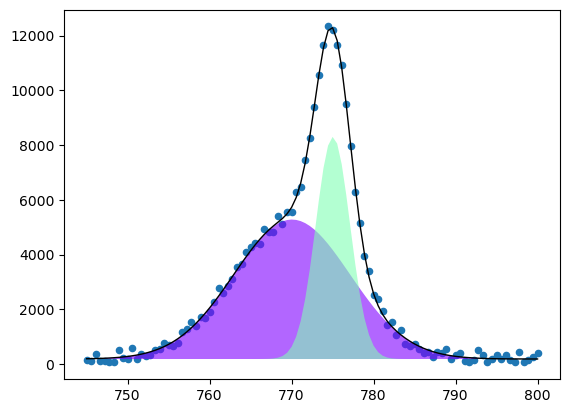

In [8]:
popt, pcov = curve_fit(guassian, x, y, p0=guess_total)

fit = guassian(x, *popt)
plt.scatter(x, y, s=20)
plt.plot(x, fit, ls='-', c='black', lw=1)

y_list  = fit_plot(x, *popt)
baseline = np.zeros_like(x) + popt[-1]
for n, i in enumerate(y_list):
    plt.fill_between(x, i, baseline, facecolor=cm.rainbow(n/len(y_list)), alpha=0.6)

In [5]:
guess = []
guess.append([4500, 490, 10])
guess.append([7500, 540, 10])

#ここから
guess.append([8000, 720, 10])
guess.append([2000, 740, 10])
#ここまでを書き加えるだけ！！！

background = 5

guess_total = []
for i in guess:
    guess_total.extend(i)
guess_total.append(background)

/home/gakkispy/miniconda3/envs/findpeaks/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/gakkispy/miniconda3/envs/findpeaks/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


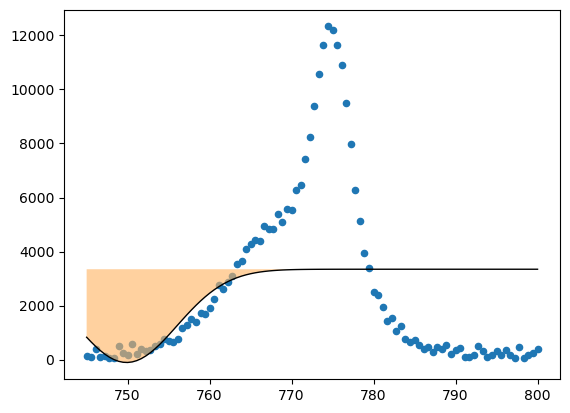

In [6]:
popt, pcov = curve_fit(guassian, x, y, p0=guess_total)

fit = guassian(x, *popt)
plt.scatter(x, y, s=20)
plt.plot(x, fit, ls='-', c='black', lw=1)

y_list  = fit_plot(x, *popt)
baseline = np.zeros_like(x) + popt[-1]
for n, i in enumerate(y_list):
    plt.fill_between(x, i, baseline, facecolor=cm.rainbow(n/len(y_list)), alpha=0.6)